# Лабораторная работа №4 "Приближение функций"

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Задача 4.1
Приведены данные о численности населения Австрии по годам с 1950-2000 гг. Сведения по последним двум годам взяты из интернета. На основе этих данных построить наилучший многочлен по МНК. Найти численность населения страны в 2019 году и сравнить полученное значение с актуальным значением (взятым из интернета). Решить ту же задачу на основе интерполяционного многочлена. То есть построить интерполяционный многочлен по значениям с 1950-2020 гг. Вычислить значение для 2019 года и сравнить с актуальными данными. Составить отчет по задаче.

$N = 25$, Австрия.  
1950 г. - $6.8$ млн человек  
1960 г. - $7$ млн человек  
1970 г. - $7.4$ млн человек  
1980 г. - $7.6$ млн человек  
1990 г. - $8$ млн человек  
2000 г. - $8$ млн человек  
2010 г. - $8.4$ млн человек  
2020 г. - $9$ млн человек  

In [2]:
year  = [(1950 + 10*n) for n in range(8)]
popul = [6.8, 7, 7.4, 7.6, 8, 8, 8.4, 9]

def solveNormSysLSM(x,y,m):          # нахождение коэффициентов для Aa = b
    a = np.zeros((m+1,m+1))
    b = np.zeros(m+1)
    s = np.zeros(2*m+1)
    for i in range(len(x)):
        temp = y[i]              # столбец b
        for j in range(m+1):
            b[j] = b[j] + temp
            temp = temp*x[i]
        temp = 1.0                   # матрица А
        for j in range(2*m+1):
            s[j] = s[j]+temp
            temp = temp*x[i]
    for i in range(m+1):
        for j in range(m+1):
            a[i,j]=s[i+j]
    return np.linalg.solve(a,b)

def LSM(c,x):                   # Возвращает значение полинома в точке x
    m = len(c) - 1
    p = c[m]
    for j in range(m):
        p = p*x + c[m-j-1]
    return p

def get_sigma(c,x,y):    # Погрешность приближения 
    n = len(x) - 1
    m = len(c) - 1
    sigma = 0.0
    for i in range(n+1):
        p = LSM(c,x[i])
        sigma += (y[i] - p)**2
    sigma = np.sqrt(sigma/(n+1))
    return sigma

In [3]:
polinom     = [(solveNormSysLSM(year, popul, m)) for m in range(len(year))]
fallibility = [(get_sigma(polinom[i], year, popul)) for i in range(len(year))]

#Поиск наилучшего многочлена
min = fallibility[0]
m = 0
for i in range(1,len(year)):
    if min > fallibility[i]:
        min = fallibility[i]
        m = i

print("Наилучший многочлен со степенью ", m)

Наилучший многочлен со степенью  6


Text(0.5, 0.98, 'Графики многочленов, МНК')

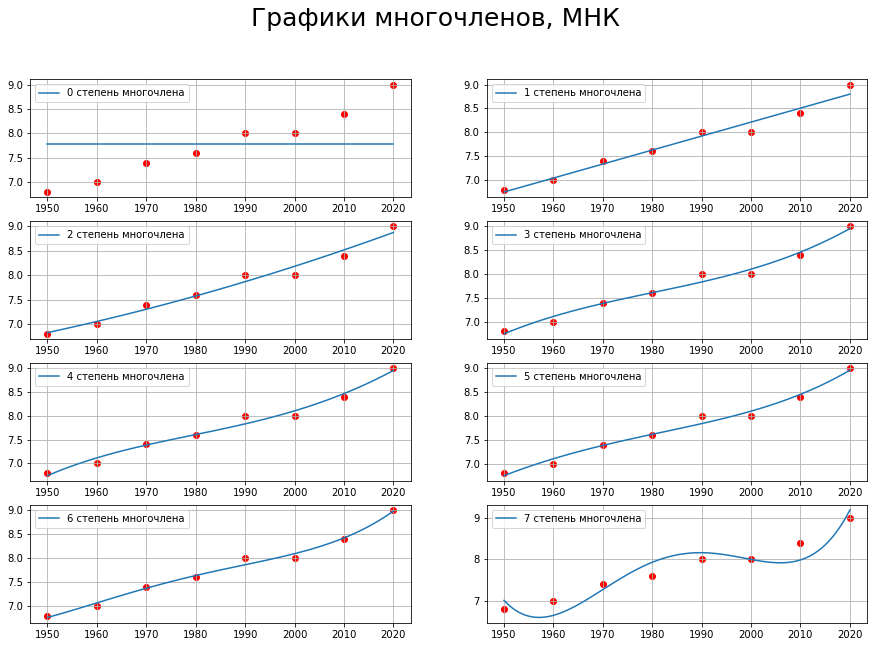

In [4]:
#Построим графики многочленов каждой степени, полученныx МНК
x_axs = np.linspace(1950,2020,100)
fig,axs = plt.subplots(4,2,figsize=(15,10))
k = 0
for i in range(4):
    for j in range(2):
        axs[i][j].plot(x_axs,[LSM(polinom[k],el) for el in x_axs], label = f'{k} степень многочлена')
        axs[i][j].scatter(year,popul,color = 'red')
        axs[i][j].legend()
        axs[i][j].grid()
        k += 1
plt.suptitle(u'Графики многочленов, МНК',fontsize = 25)

In [5]:
print("Численность населения в 2019, найденная методом наименьших квадратов:\n",LSM(polinom[5],2019))
print("Численность населения в 2019, найденная в интернете:\n", 8.924)

Численность населения в 2019, найденная методом наименьших квадратов:
 8.89972004640731
Численность населения в 2019, найденная в интернете:
 8.924


In [6]:
#Многочлен Лагранжа
def Lagrange(X,Y): 
    def L(i): 
        return lambda x: np.prod([(x-X[j])/(X[i]-X[j]) for j in range(len(X)) if i != j]) * Y[i]
    Sx = [L(i) for i in range(len(X))]
    return lambda x: np.sum([s(x) for s in Sx])

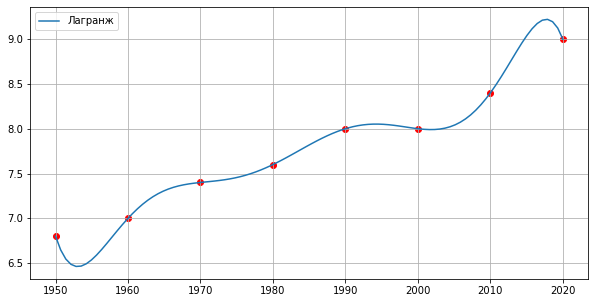

In [7]:
L1 = Lagrange(year,popul)
x_axs = np.linspace(1950,2020,100)

fig,axs = plt.subplots(1,figsize=(10,5))

axs.plot(x_axs,[L1(x) for x in x_axs], label = "Лагранж")
axs.scatter(year,popul,color = 'red')
axs.legend()
axs.grid()

In [8]:
print("Численность населения в 2019, найденная с помощью многочлена Лагранжа:\n",L1(2019))
print("Численность населения в 2019, найденная в интернете:\n", 8.924)

Численность населения в 2019, найденная с помощью многочлена Лагранжа:
 9.159063626250003
Численность населения в 2019, найденная в интернете:
 8.924


## Задача 4.2
Дана функция $y = f(x)$. Приблизить функцию методом интерполяции, используя многочлен Лагранжа. Степень многочлена N подобрать таким образом, чтобы максимальная величина погрешности на отрезке $[a, b]$ не превышала заданной величины $\varepsilon$. Построить графики многочленов и графики погрешностей. Приблизить функцию методом интерполяции, указанным в индивидуальном варианте. Сравнить полученные результаты.

$N = 25$

$f(x) = \frac{11sin(x^3)}{x}$  
$[a, b] = [1, 2.75]$  
$\varepsilon = 0.001$  

Метод: фундаментальный сплайн.

In [9]:
def f(x):
    return 11*np.sin(x**3) / x
def df(x):
    return 33*x*np.cos(x**3) - (11*np.sin(x**3) / (x**2))
a = 1
b = 2.75
n = 10
eps = 0.001
# Составим таблицу значений функции:
x_ = np.linspace(a, b, n+1)
print(x_)
y_ = f(x_)
print(y_)

[1.    1.175 1.35  1.525 1.7   1.875 2.05  2.225 2.4   2.575 2.75 ]
[ 9.25618083  9.34931992  5.1312097  -2.84200621 -6.34082061  1.78191841
  3.88513479 -4.9428739   4.36041234 -4.18248319  3.7197952 ]


## Задача 4.3
Задана функция $f(x)$, определенная на отрезке $[-1, 1]$. Требуется разложить функцию в ряд Тейлора в окрестности нуля с точностью $\varepsilon$ и произвести экономизацию полученного степенного ряда.

$N = 25$

$f(x) = e^x - 1$

12


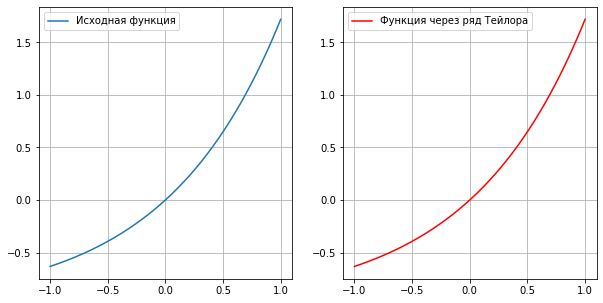

In [10]:
def f(x):
    return np.exp(x) - 1

def c_(n):
    return 1 / np.math.factorial(n)

def S(x, n):
    return sum([c_(n) * x**n for n in range(1,c)])

x_axs = np.linspace(-1,1,1000)
c = 0
while max(abs(f(x_axs) - S(x_axs,c))) >= 1e-8:
    c += 1
print(c)

fig,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].plot(x_axs,f(x_axs), label = 'Исходная функция')
axs[0].legend()
axs[0].grid()

axs[1].plot(x_axs,S(x_axs,c), color = "red", label = 'Функция через ряд Тейлора')
axs[1].legend()
axs[1].grid()

Конец экономизации 2


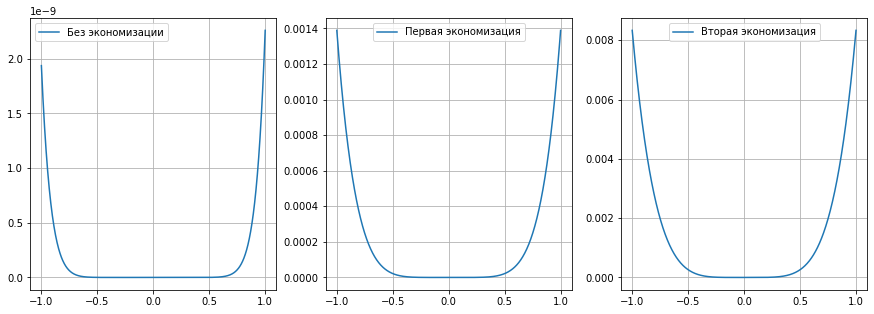

In [11]:
# Многочлены Чебышева
def T(x,n):
    if n == 0:
        return 1
    if n == 1:
        return x
    return 2*x*T(x, n - 1) - T(x, n - 2)

# Формулы экономизации степенного ряда:
def psEcon6(x):
    return (48*x**4 - 18*x**2 + 1 + T(x,6))/32

def psEcon5(x):
    return (20*x**3 - 5*x + T(x,5))/16

def psEcon4(x):
    return (8*x**2 - 1 + T(x,4))/8

if abs(max(f(x_axs) - S(x_axs,5) - c_(6) * psEcon6(x_axs))) < 10**-8:
    if abs(max(f(x_axs) - S(x_axs,4) - c_(5) * psEcon5(x_axs))) < 10**-8:
        if abs(max(f(x_axs) - S(x_axs,3) - c_(4) * psEcon4(x_axs))) < 10**-8:
            print("Нужна еще формула")
        else: print("Конец экономизации 3")
    else: print("Конец экономизации 2")
else: print("Конец экономизации 1")

fig,axs = plt.subplots(1,3,figsize=(15,5))
axs[0].plot(x_axs,abs(f(x_axs) - S(x_axs,6)), label = 'Без экономизации')
axs[0].legend()
axs[0].grid()

axs[1].plot(x_axs,abs(f(x_axs) - S(x_axs,5) - c_(6) * psEcon6(x_axs)), label = 'Первая экономизация')
axs[1].legend()
axs[1].grid()

axs[2].plot(x_axs,abs(f(x_axs) - S(x_axs,4) - c_(5) * psEcon5(x_axs)), label = 'Вторая экономизация')
axs[2].legend()
axs[2].grid()
